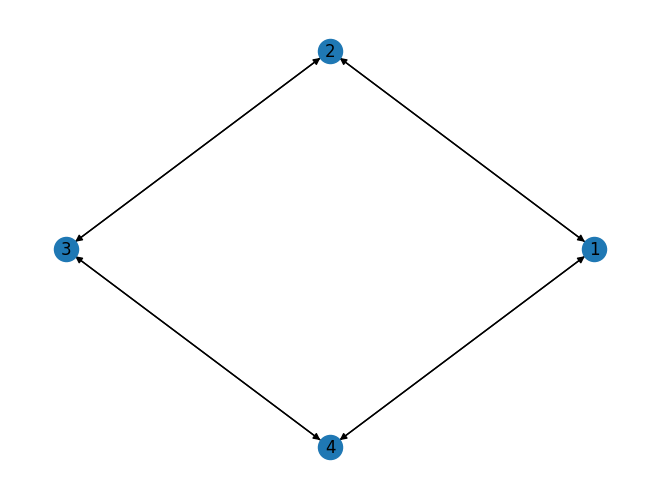

In [6]:
# let's talk about graph theory:

import networkx as nx
import numpy as np

G = nx.DiGraph()
nx.add_cycle(G, np.arange(1,5))
nx.add_cycle(G, np.arange(4,0,-1))

nx.draw_circular(G, with_labels=True)

In [93]:
# retrive the adjacency matrix from G
W = nx.adjacency_matrix(G).todense()

# print the adjacency matrix
print(f"W:\n{W}\n")

# compute the degrees
degrees = np.sum(W, axis=1)

# print the degrees
print(f"Degrees:\n {degrees}\n")

# diagonalize the degrees
D = np.diag(degrees)

# print D
print(f"D:\n{D}\n")

# compute P: the transition matrix
# P = D^-1 * W
P = np.linalg.inv(D) @ W
print(f"P:\n{P}\n")

W:
[[0 1 0 1]
 [1 0 1 0]
 [0 1 0 1]
 [1 0 1 0]]

Degrees:
 [2 2 2 2]

D:
[[2 0 0 0]
 [0 2 0 0]
 [0 0 2 0]
 [0 0 0 2]]

P:
[[0.  0.5 0.  0.5]
 [0.5 0.  0.5 0. ]
 [0.  0.5 0.  0.5]
 [0.5 0.  0.5 0. ]]



In [144]:
# consider that the graph is periodic
"""
You can see that by looking at the W adjacency matrix:

If you try to do the power of W, you will see that the
matrix will always have 0 values.
That's because there are not closed walks of odd length.

(W^n)ij equals the number of walks of length n from i to j.
"""

# import reduce:
from functools import reduce

# compute the number of walks of length 10 for each path
length = 5
walks = reduce(np.dot,[W]*length)

# print the number of walks for each node with length 10
print(f"Number of walks of length {length}:\n{walks}\n")

# check if the graph is periodic, with the nx.is_aperiodic function
print(f"G is aperiodic: {nx.is_aperiodic(G)}\n")

Number of walks of length 5:
[[ 0 16  0 16]
 [16  0 16  0]
 [ 0 16  0 16]
 [16  0 16  0]]

G is aperiodic: False



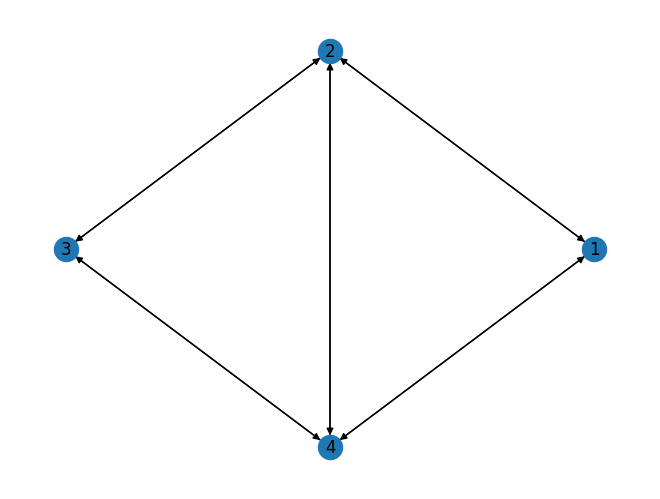

In [226]:
# let's make it aperiodic: add a cycle with odd length
G.add_edges_from([(2,4),(4,2)])
nx.draw_circular(G, with_labels=True)

# retrive the adjacency matrix from G
W = nx.adjacency_matrix(G).todense()

In [247]:
# check if the graph is periodic, with the nx.is_aperiodic function
print(f"G is aperiodic: {nx.is_aperiodic(G)}\n")

# find the length for which power of W does not have 0 values
for length in range(1,1000):
    walks = reduce(np.dot,[W]*length)
    if walks.all():
        break
print(f"Smallest power of W with no 0 values is {length}:")
print(walks,"\n")

# there are closed walks of both odd and even length, for example 4 and 5
# so the graph is aperiodic because gcd(4,5) = 1

# let's calculate P: the transition matrix
# P = D^-1 * W
degrees = np.sum(W, axis=1)
D = np.diag(degrees)
P = np.linalg.inv(D) @ W

# print P
print(f"P:\n{P}\n")

# let's calculate the stationary distribution
# pi = lim_{n->inf} P^n

for length in range(1,1000):
    if np.array_equal(reduce(np.dot,[P]*length),reduce(np.dot,[P]*(length+1))):
        print(f"Stationary distribution {length}:\n{reduce(np.dot,[P]*length)}\n")
        break
    
    

G is aperiodic: False

Smallest power of W with no 0 values is 2:
[[2 1 2 1]
 [1 3 1 2]
 [2 1 2 1]
 [1 2 1 3]] 

P:
[[0.         0.5        0.         0.5       ]
 [0.33333333 0.         0.33333333 0.33333333]
 [0.         0.5        0.         0.5       ]
 [0.33333333 0.33333333 0.33333333 0.        ]]

Stationary distribution 94:
[[0.2 0.3 0.2 0.3]
 [0.2 0.3 0.2 0.3]
 [0.2 0.3 0.2 0.3]
 [0.2 0.3 0.2 0.3]]



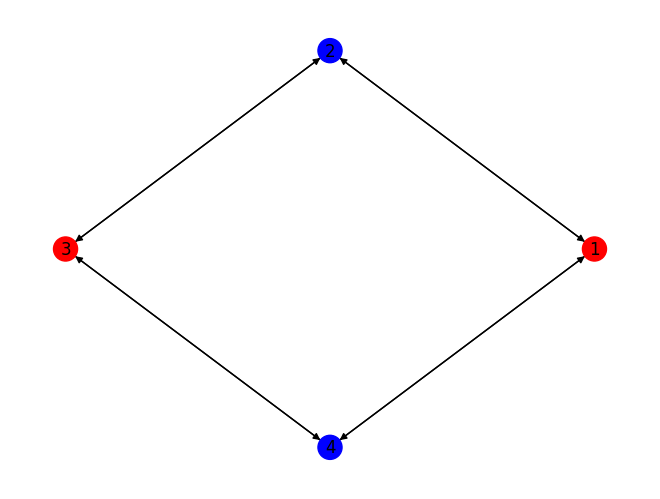

In [251]:
# let's exploit the notion of coloring:
# a graph is bipartite if and only if it is possible to color it with 2 colors
# such that no two adjacent nodes have the same color   

# let's create a bipartite graph
G = nx.DiGraph()
nx.add_cycle(G, np.arange(1,5))
nx.add_cycle(G, np.arange(4,0,-1))

# let's color it:
color_map = ['red' if i%2 else 'blue' for i in G.nodes]
nx.draw_circular(G, with_labels=True, node_color=color_map)

# calculate the adjacency matrix W and P
W = nx.adjacency_matrix(G).todense()
degrees = np.sum(W, axis=1)
D = np.diag(degrees)
P = np.linalg.inv(D) @ W

In [274]:
# let's check if it is bipartite
print(f"G is bipartite: {nx.is_bipartite(G)}\n")

# 2 theorems can be exploited:
# 1. A graph is bipartite if and only if it has only even circuits.
# (def of circuit: a closed walk with no repeated edges)

# 2. If a graph is bipartite, then the spectrum of P contains -1.
# This is a conseguence of PERRON-FROBENIUS THEOREM.
"""
Proof:
If a graph is bipartite, then all the cycles are even.
This means that the eigenvalues of W are symmetric with respect to the origin.

The eigenvalues of P are the eigenvalues of W normalized by the degrees.
This means that the spectrum of P is symmetric with respect to the origin.
Therefore it must contain both eigenvalues 1 and -1.
"""

# calculate eigenvalues of W and P
eigvals_W = np.linalg.eigvals(W)
eigvals_P = np.linalg.eigvals(P)

# print eigenvalues of W and P
print(f"Eigenvalues of W:\n{eigvals_W}\n")
print(f"Eigenvalues of P:\n{eigvals_P}\n")

G is bipartite: True

Eigenvalues of W:
[-2.00000000e+00  6.59737022e-17  2.00000000e+00  0.00000000e+00]

Eigenvalues of P:
[-1.00000000e+00  3.29868511e-17  1.00000000e+00  0.00000000e+00]



In [270]:
# The trace of a matrix is the sum of its diagonal elements.
# The trace of a matrix is  also the sum of its eigenvalues. (fundamental property of linearalgebra)

# the trace of W is the number of circuits of length 1 (the diagonal elements)
# the graph is bipartite, so the number of circuits of length 1 (odd) is 0.
np.isclose(np.trace(W), np.sum(eigvals_W))
# both are approximately 0

# the trace of W to the power of x is the number of circuits of length x
length = 3
np.trace(reduce(np.dot,[W]*length))
# It is possible to show that for a bipartite graph, 
# the number of circuits of any odd length is always 0.

0

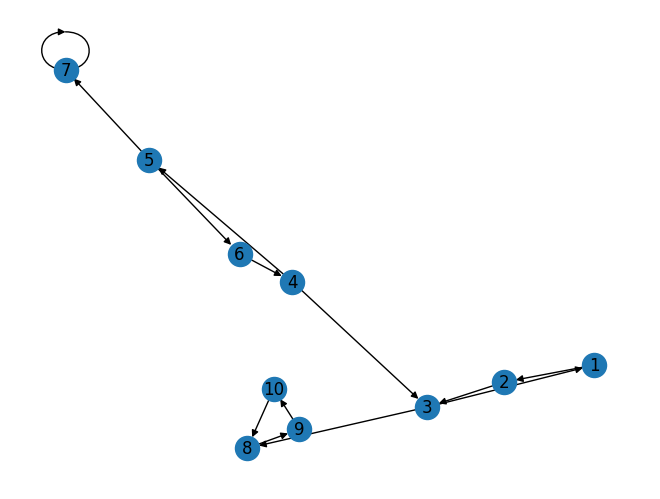

In [280]:
# let's now dive into INVARIANT PROBABILITY DISTRIBUTIONS:
# Def: an invariant distribution pi of G is a normalized eigenvector of P.T
# with eigenvalue 1.

# create a new graph
G = nx.DiGraph()
nx.add_cycle(G, np.arange(1,4))
nx.add_cycle(G, np.arange(4,7))
nx.add_cycle(G, np.arange(8,11))
G.add_edges_from([(4,3),(3,8),(5,7),(7,7)])

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)

In [281]:
# let's comput W and P
W = nx.adjacency_matrix(G).todense()
degrees = np.sum(W, axis=1)
D = np.diag(degrees)
P = np.linalg.inv(D) @ W

# let's compute eigenvalues and eigenvectors of P.T
eigvals, eigvecs = np.linalg.eig(P.T)

# print eigenvalues and eigenvectors of P.T
print(f"Eigenvalues of P.T:\n{eigvals}\n")
print(f"Eigenvectors of P.T:\n{eigvecs}\n")

Eigenvalues of P.T:
[ 1.        +0.j         -0.5       +0.8660254j  -0.5       -0.8660254j
 -0.39685026+0.68736482j -0.39685026-0.68736482j  1.        +0.j
  0.79370053+0.j         -0.31498026+0.54556182j -0.31498026-0.54556182j
  0.62996052+0.j        ]

Eigenvectors of P.T:
[[ 0.00000000e+00+0.00000000e+00j  4.37028443e-17-2.33101360e-17j
   4.37028443e-17+2.33101360e-17j  1.56445019e-01+2.70970721e-01j
   1.56445019e-01-2.70970721e-01j  5.86872097e-16+0.00000000e+00j
   3.12890037e-01+0.00000000e+00j  1.47397796e-01-2.55300472e-01j
   1.47397796e-01+2.55300472e-01j  2.65285531e-01+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j  1.18232876e-16-1.96952256e-16j
   1.18232876e-16+1.96952256e-16j  1.97108372e-01-3.41401715e-01j
   1.97108372e-01+3.41401715e-01j  7.57474451e-16+0.00000000e+00j
   3.94216744e-01+0.00000000e+00j -4.67958833e-01+5.12600152e-16j
  -4.67958833e-01-5.12600152e-16j  4.21114531e-01+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j -7.69865866e-17+1.61418986

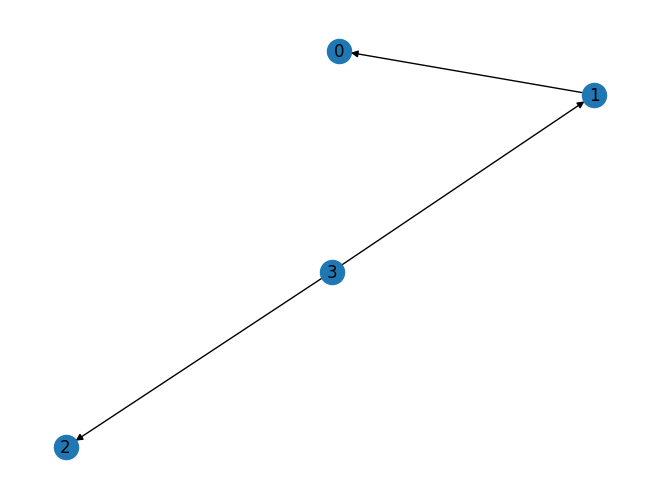

In [282]:
# let's compute the condensation graph of G
CG = nx.condensation(G)
nx.draw(CG, with_labels=True)

# we have a theorem:
# If G is strongly connected, then the multeplicity 
# of the eigenvalue 1 of P.T is 1.

# But we could also have a multeple eigenvalue 1 of 1 
# and a graph not strongly connected.